## Кластерный анализ регионов ##

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 85


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
# загружаем датасет, регион переводим сразу в индекс

work_clust = pd.read_csv('C:/00_Projects/Lenin/Datasets/04_work_data/work_weight.csv', index_col='region')

In [4]:
work_clust.head()

,datawrapperName,city_m5sts,city_m10sts,lenin_street_cm5st,lenin_street_cm10st,cities_1_lsts_cm5s,cities_1_lsts_cm10s,monument_OKN_cm5sts,monument_OKN_cm10sts,monument_lst_cm5sts,monument_lst_cm10sts,lenin_street_weight_5,lenin_street_weight_10,cities_1_lsts_weight_5,cities_1_lsts_weight_10,monument_OKN_weight_5,monument_OKN_weight_10,monument_lst_weight_5,monument_lst_weight_10
region,,,,,,,,,,,,,,,,,,,
Алтайский край,Алтайский край,897,482,213.0,161.0,204.0,152.0,2.0,2.0,68,65,0.2375,0.3340,0.2274,0.3154,0.0022,0.0041,0.0758,0.1349
Амурская область,Амурская область,340,159,57.0,46.0,53.0,42.0,20.0,19.0,22,20,0.1676,0.2893,0.1559,0.2642,0.0588,0.1195,0.0647,0.1258
Архангельская область,Архангельская область,351,167,39.0,37.0,33.0,31.0,0.0,0.0,31,30,0.1111,0.2216,0.0940,0.1856,0.0000,0.0000,0.0883,0.1796
Астраханская область,Астраханская область,228,170,106.0,88.0,93.0,77.0,1.0,1.0,21,19,0.4649,0.5176,0.4079,0.4529,0.0044,0.0059,0.0921,0.1118
Белгородская область,Белгородская область,553,247,73.0,55.0,67.0,49.0,11.0,9.0,56,47,0.1320,0.2227,0.1212,0.1984,0.0199,0.0364,0.1013,0.1903


In [5]:
first = [
    'Краснодарский край', 'Адыгея', 'Калмыкия', 'Ставропольский край', 'Мордовия',
    'Чечня', 'Ингушетия'
]

In [6]:
work_clust = work_clust[~work_clust.index.isin(first)]

In [7]:
work_clust.columns

Index(['datawrapperName', 'city_m5sts', 'city_m10sts', 'lenin_street_cm5st',
       'lenin_street_cm10st', 'cities_1_lsts_cm5s', 'cities_1_lsts_cm10s',
       'monument_OKN_cm5sts', 'monument_OKN_cm10sts', 'monument_lst_cm5sts',
       'monument_lst_cm10sts', 'lenin_street_weight_5',
       'lenin_street_weight_10', 'cities_1_lsts_weight_5',
       'cities_1_lsts_weight_10', 'monument_OKN_weight_5',
       'monument_OKN_weight_10', 'monument_lst_weight_5',
       'monument_lst_weight_10'],
      dtype='object')

In [8]:
# отбираем нужные столбцы для анализа

need_columns = [
    'cities_1_lsts_weight_10',
    'monument_OKN_weight_10',
    'monument_lst_weight_10']

### Иерархический кластерный анализ ###

In [9]:
# Нормализуем данные

data_normed = preprocessing.MinMaxScaler().fit_transform(work_clust[need_columns].values)

In [10]:
data_normed[:3]

array([[0.48590356, 0.03075769, 0.21853596],
       [0.40702511, 0.89647412, 0.19905822],
       [0.28593437, 0.        , 0.31421233]])

In [11]:
# Вычисляем расстояния между данными (строками массива data_for_clust)
# по умолчанию евклидово расстояние

data_dist = pdist(data_normed, 'euclidean')

In [12]:
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров


link = linkage(data_dist, method='ward')

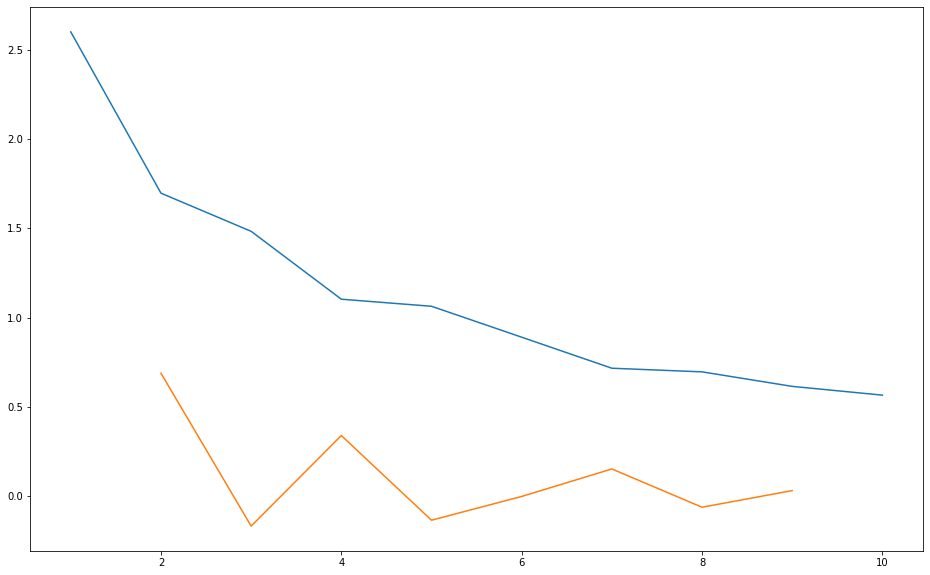

Рекомендованное количество кластеров: 2


In [13]:
plt.rcParams['figure.figsize']=(16, 10)

last = link[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

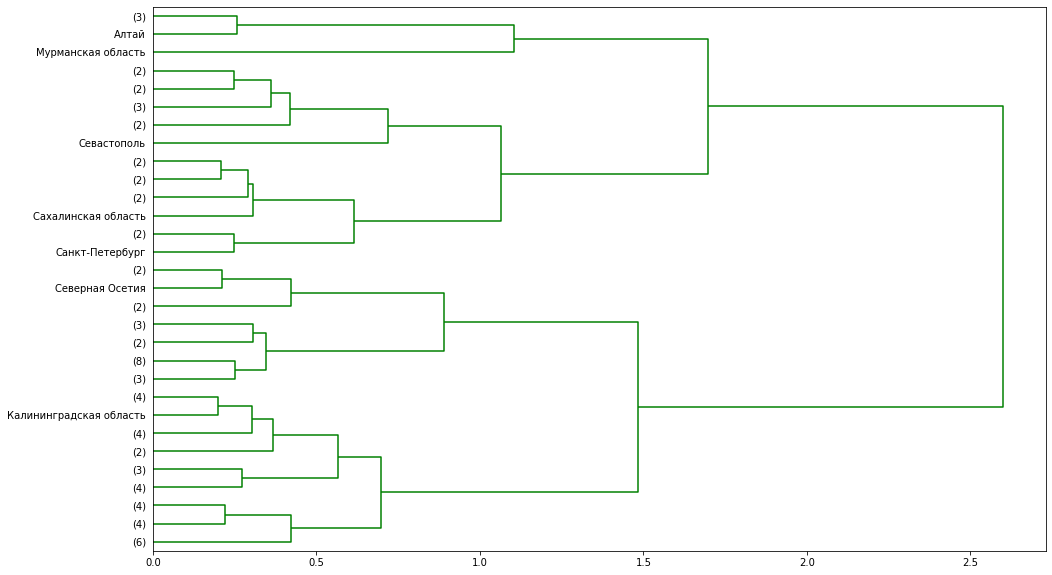

In [14]:
# строим дендрограмму 

dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels = work_clust.index.tolist(),
                
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode = 'lastp',
                
                # повернуть подписи вертикально
                color_threshold = 5,
                orientation = 'right',
                leaf_rotation=0.)

In [15]:
# Задаем количество кластеров

n_clusts = 4

In [16]:
# иерархическая кластеризация

clusters = fcluster(link, n_clusts, criterion='maxclust')

clusters

array([1, 4, 1, 2, 3, 3, 1, 1, 1, 2, 1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 3, 4,
       1, 1, 3, 2, 2, 3, 1, 2, 2, 1, 4, 1, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1,
       4, 2, 2, 4, 1, 3, 3, 1, 1, 2, 2, 3, 2, 3, 1, 1, 3, 3, 2, 1, 1, 3,
       2, 3, 2, 1, 1, 1, 2, 2, 2, 3, 2, 1], dtype=int32)

In [17]:
# номера столбцов

for i in enumerate(need_columns):
    print(i[0], ': ', i[1], sep='')

0: cities_1_lsts_weight_10
1: monument_OKN_weight_10
2: monument_lst_weight_10


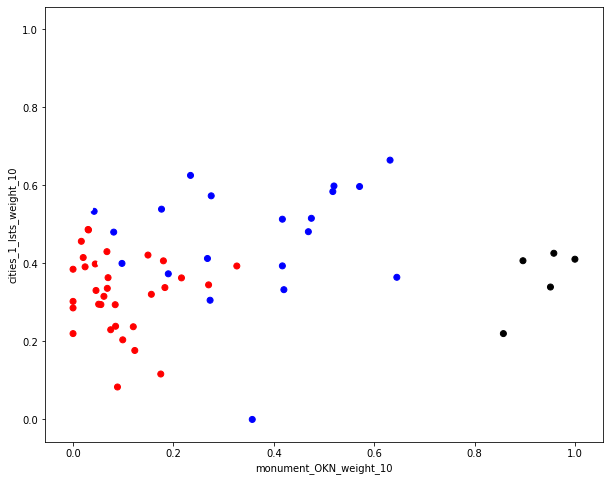

In [18]:
# Чтобы построить диаграмму в разных осях, меняйте номера столбцов

x = 1
y = 0

plt.figure(figsize=(10, 8))

plt.scatter(data_normed[:,x], data_normed[:,y], c=clusters, cmap='flag')
plt.xlabel(need_columns[x])
plt.ylabel(need_columns[y]);
plt.show()

In [19]:
# добавляем номер кластера

work_clust['cluster_hierarchy'] = clusters

In [20]:
# группируем

res_hierarchy = work_clust.groupby('cluster_hierarchy')[need_columns].mean()

res_hierarchy['Объектов в кластере'] = work_clust.groupby('cluster_hierarchy').size().values

In [21]:
# средние цифры по кластерам и количество объектов

res_hierarchy

,cities_1_lsts_weight_10,monument_OKN_weight_10,monument_lst_weight_10,Объектов в кластере
cluster_hierarchy,,,,
1,0.210266,0.012144,0.133662,32
2,0.396038,0.007205,0.105843,21
3,0.301550,0.047170,0.232275,20
4,0.234160,0.124320,0.176220,5


In [22]:
# состав кластеров

work_clust[work_clust['cluster_hierarchy'] == 1][need_columns]

,cities_1_lsts_weight_10,monument_OKN_weight_10,monument_lst_weight_10
region,,,
Алтайский край,0.3154,0.0041,0.1349
Архангельская область,0.1856,0.0000,0.1796
Владимирская область,0.2356,0.0288,0.1490
Волгоградская область,0.2965,0.0022,0.1305
Вологодская область,0.1493,0.0100,0.1294
Москва,0.1148,0.0164,0.0328
Еврейская АО,0.2083,0.0208,0.1250
Забайкальский край,0.1965,0.0000,0.1092
Калининградская область,0.0756,0.0233,0.1570


### K-means ###

In [23]:
# строим кластеризаци методом KMeans

km = KMeans(n_clusters=n_clusts).fit(data_normed)

In [24]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1

km.labels_ +1

array([2, 4, 3, 2, 3, 1, 3, 2, 3, 2, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3, 1, 4,
       3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 1, 3, 2, 3, 2, 1, 3, 3, 3, 2, 2, 3,
       4, 2, 2, 4, 3, 1, 1, 3, 3, 2, 2, 1, 2, 1, 3, 3, 2, 1, 2, 3, 3, 3,
       2, 1, 3, 3, 3, 3, 2, 2, 2, 1, 2, 3])

In [25]:
# номера столбцов

for i in enumerate(need_columns):
    print(i[0], ': ', i[1], sep='')

0: cities_1_lsts_weight_10
1: monument_OKN_weight_10
2: monument_lst_weight_10


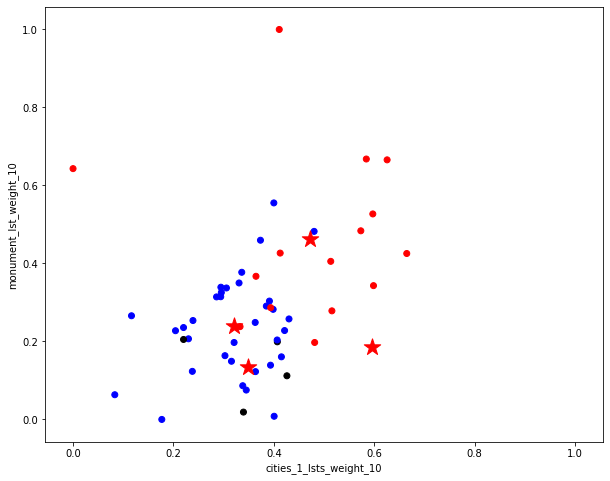

In [26]:
# Чтобы построить диаграмму в разных осях, меняйте номера столбцов
# звездочки центры кластеров

x = 0
y = 2

centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(data_normed[:,x], data_normed[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(need_columns[x])
plt.ylabel(need_columns[y]);
plt.show()

In [27]:
# к оригинальным данным добавляем номера кластеров

work_clust['cluster_KMeans'] = km.labels_+1

In [28]:
# группируем

res_KMeans = work_clust.groupby('cluster_KMeans')[need_columns].mean()
res_KMeans['объектов в KM'] = work_clust.groupby('cluster_KMeans').size().values

In [29]:
# средние цифры по кластерам и количество объектов

res_KMeans

,cities_1_lsts_weight_10,monument_OKN_weight_10,monument_lst_weight_10,объектов в KM
cluster_KMeans,,,,
1,0.305933,0.064140,0.249440,15
2,0.387248,0.007336,0.119276,25
3,0.208024,0.013856,0.144762,34
4,0.226025,0.122075,0.095275,4


In [30]:
# состав кластеров

work_clust[work_clust['cluster_KMeans'] == 5][need_columns]

,cities_1_lsts_weight_10,monument_OKN_weight_10,monument_lst_weight_10
region,,,


In [31]:
work_clust.to_excel('C:/00_Projects/Lenin/Datasets/04_work_data/hierarchy.xlsx', encoding='utf-8', index=False)

In [32]:
res_hierarchy.to_excel('C:/00_Projects/Lenin/Datasets/04_work_data/res_hierarchy.xlsx', encoding='utf-8', index=False)